# 动手学深度学习 7.2节: 使用块的网络(VGG) 示例代码

In [8]:
import torch
from torch import nn

定义生成VGG块的函数

In [9]:
def vgg_block(num_convs, in_channels, out_channels):
	"""
	Define VGG block

	Args:
		num_convs (int): Number of convolutional layers in the block.
		in_channels (int): Number of input channels.
		out_channels (int): Number of output channels.
	"""
	layer = []
	for _ in range(num_convs):
		layer.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
		layer.append(nn.ReLU())
		in_channels = out_channels
	layer.append(nn.MaxPool2d(kernel_size=2, stride=2))
	
	return nn.Sequential(*layer)

生成VGG网络

In [10]:
def vgg(conv_arch):
	"""
	Define VGG architecture

	Args:
		conv_arch (list): 包含元组的列表, 列表中的每个元素分别是 (VGG块中卷积层的个数, 输出的通道数)
	"""
	conv_blocks = []
	in_channels = 1
	out_channels = in_channels

	for num_convs, out_channels in conv_arch:
		conv_blocks.append(vgg_block(num_convs, in_channels, out_channels))
		in_channels = out_channels
	
	return nn.Sequential(
		*conv_blocks,
		nn.Flatten(),
		nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
		nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
		nn.Linear(4096, 10)
	)

In [11]:
conv_arch = [(1, 64), (1, 128), (2, 256), (2, 512), (2, 512)]
model = vgg(conv_arch)
X = torch.randn(1, 1, 224, 224)
for layer in model:
	X = layer(X)
	print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


训练

Finally test acc is 0.9192708333333334


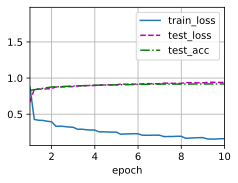

In [12]:
from utils.data.mnist import load_data_fashion_mnist
from utils.train.d2l_train import train_convolution_network
lr, num_epochs, batch_size = 0.05, 10, 128

model = vgg(conv_arch)

train_loader, test_loader = load_data_fashion_mnist(batch_size=batch_size, resize=224)

train_convolution_network(model, train_loader, test_loader, num_epochs, lr)